### Twitter Sentiment Analysis 

<br>


Apple is one of the largest technology companies in the world, this is nothing new for anyone, this project consists of analyzing what is said about Apple and its products through Tweets.

Identify the feeling of each Apple customer, better understand how the company's image is going on a social network, the main topics talked about Apple.



<br>



<p align=center>
<img src="https://exame.com/wp-content/uploads/2020/05/gettyimages-1026919434.jpg" width="60%"></p>


<br>








This project consists of creating an AI that can identify the feeling of each tweet citing Apple, and classifies it as <b> Positive, Negative or Neutral </b> thus allowing future improvements in products, services and even promoting a private marketing campaign, the main objective is to understand the customer's feeling towards Apple on Twitter.





<hr>

In [1]:
!pip install emoji
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip

In [2]:
import re
import string
import random 
import time 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import emoji 
from PIL import  Image

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')


import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import Flatten, Embedding, Dropout
from tensorflow.keras.layers import Conv1D, SpatialDropout1D
from tensorflow.keras.layers import Dense, Input 
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import LSTM, Dropout, GRU, Bidirectional

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# set global seed 
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
path = '/content/drive/My Drive/Deep Learning - Projetos/NLP - Apple Sentiments/apple-twitter-sentiment-texts.csv'
data = pd.read_csv(path)
data.head()

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1
1,What Happened To Apple Inc? http://t.co/FJEX...,0
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0


In [5]:
data['sentiment'] = data['sentiment'].astype(str)
data['text'] = data['text'].astype(str)

In [6]:
# Cleaning text 

def cleaning_text(text):

  """
  Cleaning text in Twetts 
  Removing unwanted characters and emojis
                 
                                          """
  
  # Removing characters and emojis 
  removing_list = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
  emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)

  text = emoji_pattern.sub(r'', str(text))
  text = re.sub(removing_list, " ", text)
  text = re.sub(r'\W+', ' ', text)
  text = re.sub("'", '', text)
  text = text.lower().strip()


  # Stemming and Stopwords 
  stemmer = SnowballStemmer('english')
  stop_words = set(stopwords.words('english'))

  tokens = []
  for token in text.split():
    if token not in stop_words:
      tokens.append(stemmer.stem(token))
    else: 
      pass 


  return " ".join(tokens)

In [7]:
data['text'] = data['text'].apply(lambda x: cleaning_text(x))

In [8]:
dicio = {'0':'Neutral', '-1':'Negative', '1':'Positive'}
data['sentiment'] = data['sentiment'].map(dicio)

In [9]:
data['sentiment'].value_counts()

Neutral     801
Negative    686
Positive    143
Name: sentiment, dtype: int64

In [10]:
#classes of tweets 
negatives = data[data.sentiment == 'Negative']['text']
positives = data[data.sentiment == 'Positive']['text']
neutral = data[data.sentiment == 'Neutral']['text']

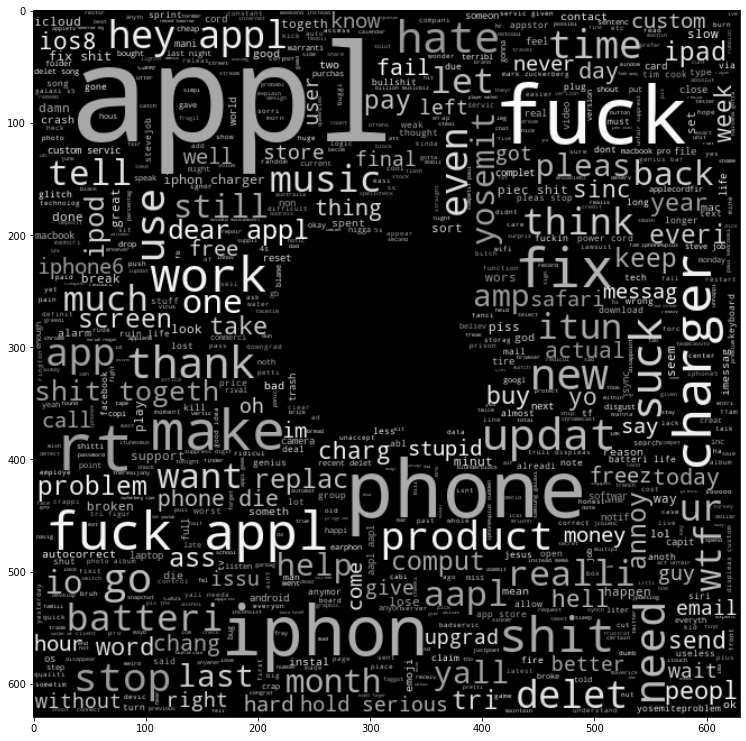

In [11]:
# Negative word cloud 

def color_map(word, font_size, position, orientation, random_state=None, **kwargs):
  return "hsl(0, 0%%, %d%%)" % random.randint(60,100)

mask = np.array(Image.open("/content/drive/My Drive/Deep Learning - Projetos/NLP - Apple Sentiments/logo_01.jpg"))


plt.figure(figsize=(15,13))
negative_cloud = WordCloud(mask=mask, color_func=color_map, max_words=10000, width=1600, height=800)
negative_cloud.generate(" ".join(negatives))

plt.imshow(negative_cloud ,interpolation='bilinear')

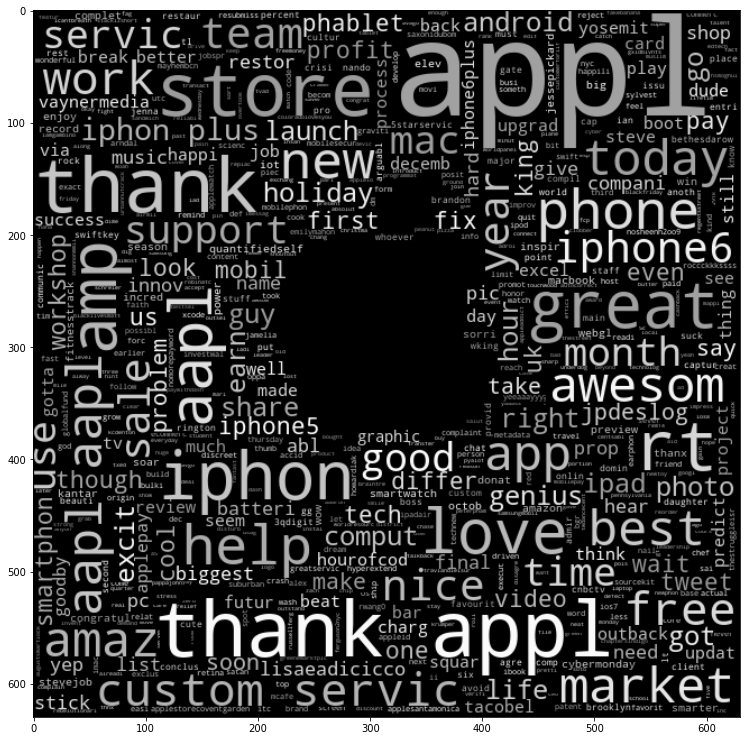

In [12]:
# Positive word cloud

plt.figure(figsize=(15,13))
positive_cloud = WordCloud(mask=mask, color_func=color_map, max_words=10000, width=1600, height=800)
positive_cloud.generate(" ".join(positives))


plt.imshow(positive_cloud ,interpolation='bilinear')

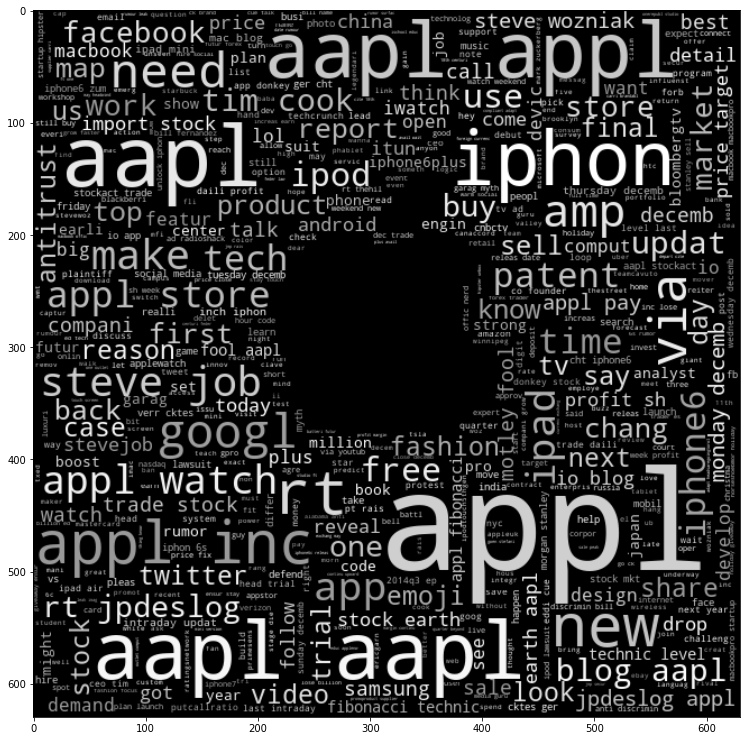

In [13]:
# Neutral word cloud 

plt.figure(figsize=(15,13))
neutral_cloud = WordCloud(mask=mask, color_func=color_map, max_words=10000, width=1600, height=800)
neutral_cloud.generate(" ".join(neutral))

plt.imshow(neutral_cloud ,interpolation='bilinear')

<hr>
<br>

#### Summary 


Across this analysis with Word Cloud, We see that: 

* Negative Words: Words with the negative feeling label, have many bad words like <b> Fuck </b> among other words related to insults in negative tweets, the word <b> Please </b> also appears a lot, another fact are words like <b> Product </b>, <b> Music </b> and the one with the biggest appearance was <b> Iphone </b> which are words related to an Apple product and services, there are many complaints about <b> Updates </b> which also made a big appearance in negative tweets.


* Positive Words: In this class of the sentiments, obtains very tweets who relationship with <b> Store </b> where there are a lot tweets about feedbacks of products,  Regarding relationship of sales of apple products at <b>Apple Store </b>  other words we found was  <b> Good </b> for feedback it was tweets about services and products receiving or adquirids, the positive tweets it was related in the field arround of product and services available by apple. 


* Neutral Tweets: The tweets that have sentiment iguals neutral, have little words that expressives, a lots tweets talks about <b> Ipad </b> or other word most common used was <b> Need </b> that would be need  have a  Iphone, Ipad or other product of apple, also talk about <b> Job </b> very peoples want to job in the Apple 


<br>
<hr>

In [14]:
def feature_engineering(data):

  """ Pipeline of Feature engineering for 
       text classification problem 
      
      1 - cleaning text 
      2 - spliting data
      3 - label encoder 
      4 - tokenization 
      5 - pad_sequences 
                                        """

  # cleaning text 
  data['text'] = data['text'].apply(lambda x: cleaning_text(x))

  # spliting data 
  X = data['text']
  y = data['sentiment']

  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

  # LabelEncoder 
  encoder = LabelEncoder()
  y_train = encoder.fit_transform(y_train.to_list())
  y_test = encoder.fit_transform(y_test.to_list())

  y_train = y_train.reshape(-1,1)
  y_test = y_test.reshape(-1,1)
  

  print('Classes: ', encoder.inverse_transform([0,1,2]))
  print('\n')


  # Tokenization 
  max_word= 3000
  tokenizer = Tokenizer(num_words=max_word)
  tokenizer.fit_on_texts(X_train)


  # Vocabulary Size 
  word_index = tokenizer.word_index
  num_words = len(word_index) + 1 

  # Tokens 
  sequence_train = tokenizer.texts_to_sequences(X_train)
  sequence_test = tokenizer.texts_to_sequences(X_test)

  # max sequence 
  MAX_SEQUENCE_LENGTH = 40 
   
  # pad_sequences 
  X_train = pad_sequences(sequences=sequence_train, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
  X_test = pad_sequences(sequences=sequence_test, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')


  return (X_train, X_test, y_train, y_test, num_words, word_index, tokenizer)

In [15]:
X_train, X_test, y_train, y_test, num_words, word_index, tokenizer = feature_engineering(data)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

Classes:  ['Negative' 'Neutral' 'Positive']


(1141, 40) (1141, 1)
(489, 40) (489, 1)


In [16]:
# Embedding parameters 
EMBEDDING_GLOVE = 300
WORD_INDEX = word_index
EMBEDDING_DIM = 150 
MAX_SEQUENCE_LENGTH = 40 
NUM_WORDS = 3430

In [31]:
# Build LSTM 


def lstm_architecture(pre_trained=False, num_words=NUM_WORDS, word_index=WORD_INDEX, embedding_dim=EMBEDDING_GLOVE, max_sequence_length=MAX_SEQUENCE_LENGTH):

  """The LSTM model architecture
  with option for use Glove embedding """


  if pre_trained:

    # Glove Embedding 
    GLOVE_EMB = '/content/glove.6B.300d.txt'


    embeddings_index = {}
    f = open(GLOVE_EMB)
    for line in f:
      values = line.split()
      word = value = values[0]
      coefs = np.asarray(values[1:], dtype='float32')
      embeddings_index[word] = coefs
    f.close()

    print('Found {} word vectors.'.format(len(embeddings_index)))


    # Embedding matrix
    embedding_matrix = np.zeros((num_words, embedding_dim))

    for word, i in word_index.items():
      embedding_vector = embeddings_index.get(word)
      if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

    # LSTM with Glove 
    model = Sequential()
    model.add(Input(shape=max_sequence_length))
    model.add(Embedding(input_dim=num_words,
                        output_dim=embedding_dim,
                        weights=[embedding_matrix],
                        input_length=max_sequence_length,
                        trainable=True))
    model.add(LSTM(units=128, recurrent_dropout=0.20, return_sequences=True))
    model.add(LSTM(units=64, recurrent_dropout=0.20, return_sequences=True))
    model.add(SpatialDropout1D(0.20))
    model.add(Dense(units=512, activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=1, activation='softmax'))

    return model 

  else:

    # LSTM without Glove 
    model = Sequential()
    model.add(Input(shape=max_sequence_length))
    model.add(Embedding(input_dim=num_words,
                        output_dim=embedding_dim,
                        input_length=max_sequence_length))
    model.add(LSTM(units=128, recurrent_dropout=0.20, return_sequences=True))
    model.add(LSTM(units=64, recurrent_dropout=0.20, return_sequences=True))
    model.add(SpatialDropout1D(0.20))
    model.add(Dense(units=512, activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=1, activation='softmax'))


    return model 

In [32]:
model = lstm_architecture(pre_trained=True, embedding_dim=300)

Found 400000 word vectors.


In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 300)           1029000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 40, 128)           219648    
_________________________________________________________________
lstm_3 (LSTM)                (None, 40, 64)            49408     
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 40, 64)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 40, 512)           33280     
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 512)           0         
_________________________________________________________________
dense_4 (Dense)              (None, 40, 64)           

In [34]:
model.compile(optimizer=Adam(0.001),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [35]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          validation_data=(X_test, y_test))

Epoch 1/50
9/9 [==============================] - 5s 596ms/step - loss: 3.6889 - accuracy: 0.4855 - val_loss: 3.6889 - val_accuracy: 0.5051
Epoch 2/50
9/9 [==============================] - 5s 504ms/step - loss: 3.6889 - accuracy: 0.4855 - val_loss: 3.6889 - val_accuracy: 0.5051
Epoch 3/50
9/9 [==============================] - 5s 510ms/step - loss: 3.6889 - accuracy: 0.4855 - val_loss: 3.6889 - val_accuracy: 0.5051
Epoch 4/50
9/9 [==============================] - 5s 519ms/step - loss: 3.6889 - accuracy: 0.4855 - val_loss: 3.6889 - val_accuracy: 0.5051
Epoch 5/50
9/9 [==============================] - 5s 501ms/step - loss: 3.6889 - accuracy: 0.4855 - val_loss: 3.6889 - val_accuracy: 0.5051
Epoch 6/50
9/9 [==============================] - 5s 506ms/step - loss: 3.6889 - accuracy: 0.4855 - val_loss: 3.6889 - val_accuracy: 0.5051
Epoch 7/50
9/9 [==============================] - 5s 509ms/step - loss: 3.6889 - accuracy: 0.4855 - val_loss: 3.6889 - val_accuracy: 0.5051
Epoch 8/50
9/9 [====